In [2]:
setwd('data')
getwd()
list.files()

[1] "C:/Users/Tim/Documents/DAND/Prosper Loan Project/data"

[1] "prosperLoanData.csv"

In [3]:
df <- read.csv('prosperLoanData.csv')

In [4]:
library(plyr)
library(ggplot2)
library(dplyr)
library(stringr)


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Frequency of Term by Income Range

In [6]:
df$IncomeRange <- factor(df$IncomeRange, levels = c("$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", 
                                                            "$100,000+", "Not displayed", "Not employed"))

In [ ]:
#Freqency of Term by Income Range
df %>%
group_by(Term, IncomeRange) %>%
summarise(num_loans = n()) %>%
head

In [ ]:
df %>%
filter(!IncomeRange %in% c('Not displayed', 'Not employed')) %>%
filter(!is.na(IncomeRange)) %>%
group_by(Term, IncomeRange) %>%
summarise(num_loans = n()) %>%
mutate(frequency = num_loans / sum(num_loans) * 100) 

In [ ]:
df %>%
filter(!IncomeRange %in% c('Not displayed', 'Not employed')) %>%
filter(!is.na(IncomeRange)) %>%
group_by(IncomeRange, Term) %>%
summarise(num_loans = n()) %>%
mutate(frequency = num_loans / sum(num_loans) * 100) %>%
ggplot(aes(x=Term, y=frequency,fill=IncomeRange)) + geom_bar(stat="identity", position="dodge")

This is interesting. In the shortest term 1-year loans the higher the Income Range the higher the portion of loans made in that income range.  
Also interesting to note is that there were no 1-year loans made to people who are in the 0% income range.  
For the middle term 3 year loans the opposite is true, and then in the 5 year term a similar pattern to the 1 yr loans reemerges.  

## Proportion per Term by Loan Status

In [ ]:
df %>%
filter(!LoanStatus == 'Cancelled') %>%
group_by(LoanStatus, Term) %>%
summarise(number_loans = n()) %>%
mutate(frequency = number_loans / sum(number_loans)) %>%
ggplot(aes(x=Term, y=frequency)) + geom_bar(stat="Identity") + facet_wrap(~LoanStatus)

## BorrowerApr by Term

In [ ]:
ggplot(df, aes(x=Term,y=BorrowerAPR, group=Term)) + geom_boxplot()

## Estimated Effective Yield by Term

In [ ]:
ggplot(df, aes(x=Term,y=EstimatedEffectiveYield,group=Term)) + geom_boxplot()

## Original Loan Amount by Term

In [ ]:
ggplot(df, aes(x=Term,y=LoanOriginalAmount,group=Term)) + geom_boxplot()

## Borrower APR by Loan Status

In [ ]:
ggplot(df, aes(x=LoanStatus,y=BorrowerAPR,group=LoanStatus)) + geom_boxplot() +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

Completed and Current loans tend to have a lower APR than loans that are Past Due or that Defaulted.

In [ ]:
#may be able to delete mutate once combined
#df %>%
#mutate(simple.LoanStatus = ifelse(str_detect(LoanStatus, "Past"), 'Past Due', as.character(LoanStatus))) 
#ggplot(aes(x=simple.LoanStatus, y=ProsperScore)) + geom_jitter(alpha=.1) +
#theme(axis.text.x = element_text(angle = 45, hjust = 1))
#looks like Prosperscore is a good predictor
#Does this work? Prosper Score is a number, but it's discrete. 
#Two nominal variables, one ordered. Results that not interesting, query keeps crashing

## Listing Category and Loan Status

In [ ]:
#can delete when combine
#simplify listing category
listingToCharacter <- function(numeric.category){
    listing.categories = c("Not Available", "Debt Consolidation", "Home Improvement", "Business",
                       "Personal Loan", "Student Use", "Auto", "Other", "Baby&Adoption","Boat",
                       "Cosmetic Procedure", "Engagement Ring", "Green Loans", "Household Expenses",
                       "Large Purchases", "Medical/Dental", "Motorcycle", "RV", "Taxes", "Vacation",
                       "Wedding Loans")
    return(listing.categories[numeric.category + 1]) 
}

In [ ]:
#can delete when combine
df$ListingCategory <- listingToCharacter(df$ListingCategory..numeric)

In [ ]:
#can delete when combine
#simplify loan status
df$LoanStatus <- factor(df$LoanStatus, levels = c('Cancelled',
                                                          'Defaulted',
                                                          'Chargedoff',
                                                          'Completed',
                                                          'Current',
                                                          'FinalPaymentInProgress',
                                                          'Past Due (1-15 days)',
                                                          'Past Due (16-30 days)',
                                                          'Past Due (31-60 days)',
                                                          'Past Due (61-90 days)',
                                                          'Past Due (91-120 days)',
                                                          'Past Due (>120 days)'
                                                         ))
levels(df$LoanStatus)

In [ ]:
#create 
#df$simple.LoanStatus <- 
#df %>% 
#mutate(simple.LoanStatus = ifelse(str_detect(LoanStatus, "Past"), 'Past Due', as.character(LoanStatus))) #%>%
#select(simple.LoanStatus)
df$LoanStatus

In [ ]:
#Are there listing Categories that are more likely to default/go past due/etc?
#need to group Loan Statuses, take frequency
df %>% 
select(ListingCategory, simple.LoanStatus) %>%
filter(simple.LoanStatus != 'Cancelled') %>%
group_by(ListingCategory, simple.LoanStatus) %>% 
summarise(rows = n()) %>%
mutate(frequency = rows / sum(rows)) %>%
ggplot(aes(x=simple.LoanStatus, y=frequency)) + geom_bar(stat="Identity") + facet_wrap(~ListingCategory)

So there is a lot we can't see in these charts, but mostly checking for distribution here. There are a couple we could check out as abberant, and we can make these charts clearer by reducing the number of loan statuses.  
Iteratively reworked this trellis to be more readable.
<p>Definitely this is a place to zoom in. 3, 12, etc.

In [ ]:
#####Loan Status  vs IncomeRange / filter with IncomeVerifiable
#IncomeVerifiable not a true bool?
#graph after fixing Loan Stuats levels
df %>%
filter(IncomeVerifiable == 'True') %>%
group_by(IncomeRange, LoanStatus) %>%
summarise(rows = n()) %>%
mutate(frequency = rows / sum(rows))


In [ ]:
#Borrower APR vs Credit Score Range(s)
#This could perhaps be improved by creating a new Credit Score Variable
ggplot(df, aes(BorrowerAPR, CreditScoreRangeUpper)) + geom_jitter(alpha = 1/20)

This is some of what we would expect to see. The higher your Credit Score the lower your APR. <p>But the thing that jumps out is the strange cluster of loans that are hovering right above 0% Apr. Let's take a look at those.
Also, see that line at .3? wonder if there is legal or psycological at work here.

In [ ]:
df %>%
filter(CreditScoreRangeUpper < 250) %>%
select(contains('Credit')) 

Looks like there is something that causes some people with no credit to be listed with a Lower Credit Score Range of 0 and an Upper of 19. It's interesting to me that loans can be made to these types of users. Might be worth exploring this population further.

In [ ]:
#Borrower APR vs Listing Category
df %>%
ggplot(aes(y=BorrowerAPR, x=ListingCategory..numeric., group=ListingCategory..numeric.)) + geom_boxplot()
#arrange by mean

Could do a t-test here to see if one category gets differnt APR than others. How does that account for other factors?

In [ ]:
#Borrower APR vs Occupation
#Probably linked to what those occupations make. 
#Let's try something different and bar plot the means
df %>%
group_by(Occupation) %>%
summarise(average_apr = mean(BorrowerAPR)) %>%
ggplot(aes(x=reorder(Occupation,desc(average_apr)), y=average_apr)) + geom_bar(stat = "Identity")
#Need to re ararnge and work Income in there are a third variable

In [ ]:
#Borrower APR vs Employment Duration 
#could probably do a t-test here too
#Not available has the lowest average apr?
#should probably be looking with boxplots
df %>%
group_by(EmploymentStatus) %>%
summarise(average_apr =  mean(BorrowerAPR)) %>%
ggplot(aes(x=reorder(EmploymentStatus, desc(average_apr)), y=average_apr)) + geom_bar(stat="Identity")

In [ ]:
#If employed, does the length of your employment effect borrower apr?
#Normal with spikes? Is there a way to check how normal a distribution is?

df %>%
filter(EmploymentStatus %in% c('Self-employed','Employed','Full-time','Part-time')) %>%
ggplot(aes(x=EmploymentStatusDuration, y=BorrowerAPR, alpha=1/100)) + geom_point()

In [ ]:
#Prosper Score ----
#ProseperScore vs Borrower State
df %>%
filter(!is.na(ProsperScore)) %>%
group_by(BorrowerState) %>%
summarise(avg_prosperscore = mean(ProsperScore)) %>%
ggplot(aes(x=reorder(BorrowerState, avg_prosperscore),y=avg_prosperscore)) + 
geom_bar(stat="Identity")

In [ ]:
#Prosper Score vs Borrower APR
df %>%
ggplot(aes(x=ProsperScore, y=BorrowerAPR, group=ProsperScore)) + geom_boxplot()

Fiarly linear, but you can see that the ProsperScore isn't the total predictor in APR

In [ ]:
#Average ProsperScore vs Occupation
#Would expect this to be very similiar to BorrowerAPR vs Occupation, maybe can lose?
df %>%
ggplot(aes(y=ProsperScore, x=Occupation, group=Occupation)) + geom_boxplot()

In [20]:
#group employment status type
employed <- c('Self-employed', 'Employed', 'Full-time')
not_answered <- c('Not available', 'Other')
df %>%
filter(!EmploymentStatus == "" ) %>%
filter(!EmploymentStatus %in% not_answered) %>%
mutate(EmploymentStatus.simple = ifelse(EmploymentStatus %in% employed, "Employed", as.character(EmploymentStatus))) %>%
group_by(EmploymentStatus.simple) %>%
summarise(n())

EmploymentStatus.simple,n()
Employed,99811
Not employed,835
Part-time,1088
Retired,795


Warning message:
"Removed 29084 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 29084 rows containing missing values (geom_point)."

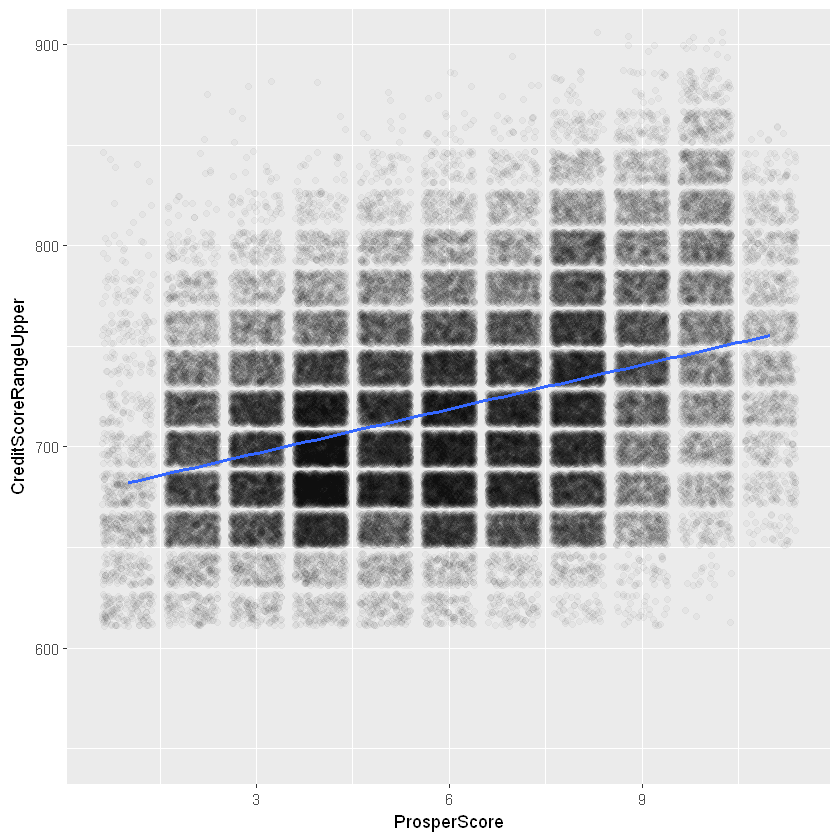

In [33]:
#ProsperScore vs Credit Range
df %>%
ggplot(aes(x = ProsperScore, y = CreditScoreRangeUpper)) +
geom_jitter(alpha=.03) +
geom_smooth(method="lm") +
coord_cartesian(ylim = c(550, 900))

I like this scatter plot with jitter because you can both see that there aren't many loans in the extremes of either range, and that there is a linear, positive relationship between Credit Score and Prosper Score, which is what we would expect.

In [ ]:
#Listing Category ----
#Listing Category vs Borrower State
df %>%
group_by(BorrowerState, ListingCategory..numeric.) %>%
summarise(count = n()) %>%
filter(count == max(count))


In [ ]:
#Listing Category --
#Occupation
df %>%
group_by(Occupation, ListingCategory..numeric.) %>%
summarise(count = n()) %>%
filter(count == max(count)) %>%
filter(ListingCategory..numeric. != 1)
#todo: complete this graph with ListingCategory.simple

In [ ]:
#Listing Category vs Employment Status
#Basically, employed vs unemployed vs retired
#Will do this after grouping Employment Status. 
#todo: complete this graph with ListingCategory.simple

In [ ]:
#Listing Category vs Credit Score
#Do people with low credit scores list for something in particular?
df %>%
select(CreditScoreRangeUpper, ListingCategory..numeric.) %>%
filter(CreditScoreRangeUpper > 250) %>%
mutate(bin = ntile(CreditScoreRangeUpper, 5)) %>%
group_by(bin, ListingCategory..numeric.) %>%
summarise(count = n(),
          minCredit = min(CreditScoreRangeUpper),
         maxCredit = max(CreditScoreRangeUpper)) %>%
filter(count == max(count)) 

In [ ]:
#--Borrower State
#Occupation
df %>% 
select(BorrowerState, Occupation) %>%
filter(BorrowerState != "") %>%
group_by(BorrowerState, Occupation) %>%
summarise(count = n()) %>%
filter(Occupation != "Other" & Occupation !="Professional") %>%
filter(count == max(count))


In [ ]:
#Borrower State Income Range (most common)
df %>%
select(BorrowerState, IncomeRange) %>%
group_by(BorrowerState, IncomeRange) %>%
summarise(count = n()) %>%
filter(count == max(count))

Warning message:
"Removed 591 rows containing missing values (geom_point)."

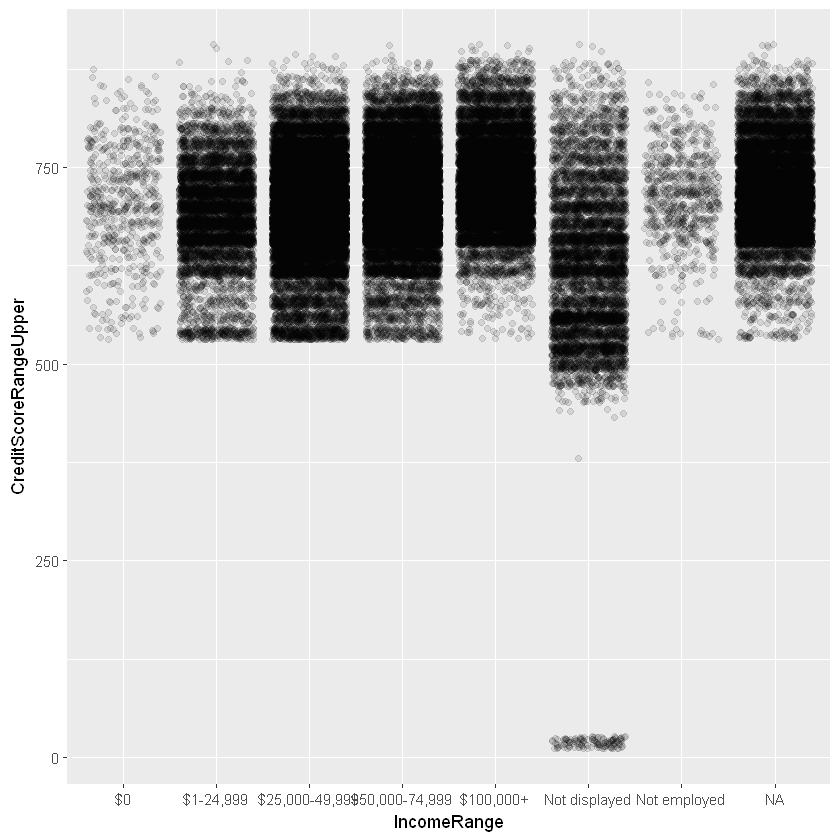

In [9]:
#--Credit Score
#- Income Range
df %>%
select(CreditScoreRangeUpper, IncomeRange) %>%
ggplot(aes(x = IncomeRange, y = CreditScoreRangeUpper)) + geom_jitter(alpha=.1)

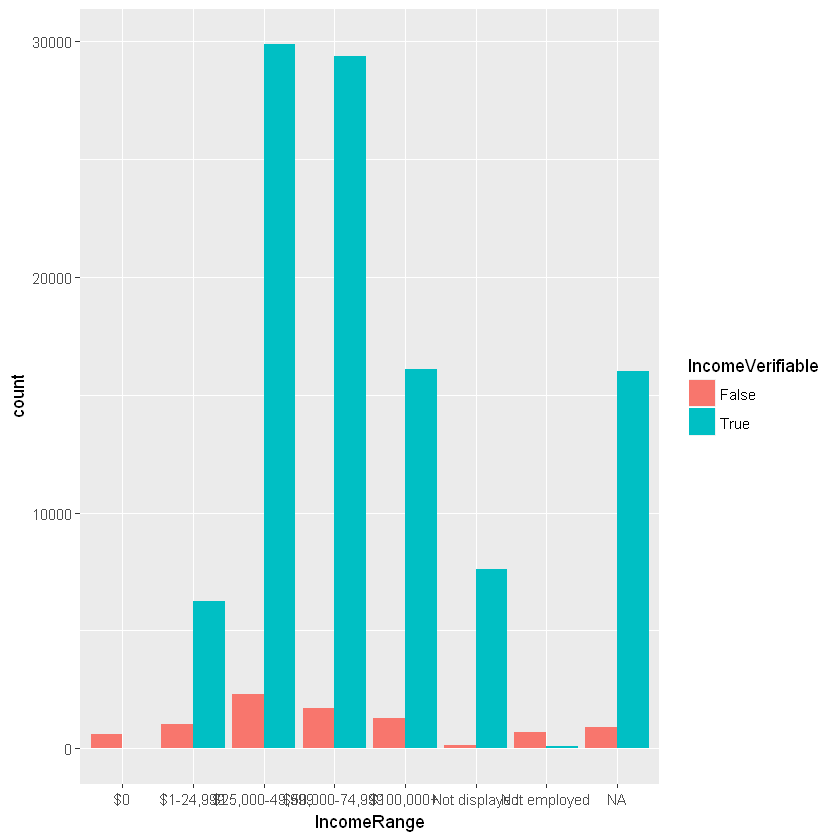

In [13]:
#--Income range
#Income range verified
#Maybe density plots or dodged bar plot?
#Perhaps this is verified to not verified proportions.
df %>%
ggplot(aes(x=IncomeRange, fill = IncomeVerifiable)) + geom_bar(position="dodge")